# Assignment 9
## Due June 27th at 12:00

Please note: 

- Read the instructions in the exercise PDF and in this notebook carefully.
- Add your solutions *only* at `YOUR CODE HERE`/`YOUR ANSWER HERE` and remove the corresponding `raise NotImplementedError()`.
- Do not chance the provided code and text, if not stated.
- Do not *add* or *delete* cells.
- Do not `import` additional functionality. 
- Before submitting: Please make sure, that your notebook can be executed from top to bottom `Menu -> Kernel -> Restart & Run all`. 

## Exercise 1: (Exact Recovery from PCA is not possible)

## a)

Since the compression matrix $W $ reduces the dimension of $x \in \mathbb{R}^n $ to a d-dimensional representation ($d<n$), the corresponding map is not injective. 

Proof by contradiction:

Assuming: 
$$u,v \in \mathbb{R}^n ; Wu = Wv \Rightarrow u= v$$

$$Wu_d = \sum_i^n W_{di} u_i ; Wv_d = \sum_i^n W_{di} v_i$$
$$Wu_d = Wv_d  \forall d $$

Let $v$ be a permutation of $u$ so that $v \neq u$
$$Wu_d = Wv_d  \forall d $$ 

still holds

Therefore $Wu = Wv \nRightarrow u= v$

## b)

The map is not injective, the projection is ambigous. Therefore it is impossible to recover from a linear compression exactly, since multiple different vectors get mapped to the same respresentation

# Exercise 2: PCA and Random Projections

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from numpy.testing import assert_equal, assert_almost_equal
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.random_projection import GaussianRandomProjection
from sklearn.decomposition import PCA

In [2]:
# load the USPS dataset
usps_df = pd.read_csv('USPS.csv', sep='\t',)
xs_usps = usps_df.drop(['Label'], axis=1).values
ys_usps = usps_df['Label'].values

xs_usps.shape, ys_usps.shape

((1000, 256), (1000,))

#### Here you can implement PCA and Random Projections yourself. This will be awarded with 1.5 bonus points per method. If you decide to do so, you have to use your implementation in this exercise. If you do not want to implement this, simply remove the NotImplementedError().

In [3]:
# Your PCA and random projection implementation HERE (OPTIONAL)
# YOUR CODE HERE

### (a) Reduce the dataset's dimensionality to d=2

In [1]:
xs_usps_pca = ... # an np.array of shape 1000x2

# YOUR CODE HERE

plt.scatter(*xs_usps_pca.T, c=ys_usps)
plt.title('PCA Projection of USPS data')
plt.show()

NameError: name 'plt' is not defined

In [2]:
xs_usps_random = ... # an np.array of shape 1000x2

# YOUR CODE HERE

plt.scatter(*xs_usps_random.T, c=ys_usps)
plt.title('Random Projection of USPS data')
plt.show()

NameError: name 'plt' is not defined

### (b) Visualize prinicipal components and random directions

In [3]:
fig, axis = plt.subplots(2, 2)

# YOUR CODE HERE

plt.show()

NameError: name 'plt' is not defined

### (c) Visualize reconstructed images

In [7]:
def reconstruct(xs_original, xs_projected):
    ''' Returns: A np.array of the same shape as xs_original
    '''

    dim = xs_projected.shape[1]
    R = np.zeros((256, dim))
    for i in range(256):
        R[i,:] = np.linalg.lstsq(xs_projected, xs_original[:,i], rcond=None)[0] 
    return (R @ xs_projected.T).T

In [8]:
# assert correctness of reconstruct
np.random.seed(42)
W = np.random.normal(size=(256,2))/np.sqrt(2)
xs_reconstructed = reconstruct(xs_usps, xs_usps @ W)
assert_almost_equal(np.linalg.norm(xs_reconstructed), 28102.566390212647)

random_projection = GaussianRandomProjection(n_components=256)
xs_usps_random = random_projection.fit_transform(xs_usps)
assert (xs_usps - reconstruct(xs_usps, xs_usps_random)).max() < 1e-8

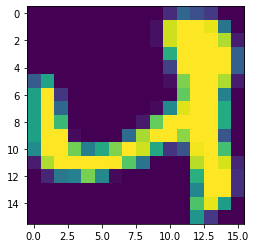

In [9]:
# we want to reconstruct digit number 100 - visualize it
digit = xs_usps[100,:]
plt.imshow(digit.reshape(16, 16))
plt.show()

In [4]:
dimensions = [1, 10, 50, 100, 256]
fig, axis = plt.subplots(2, 5, figsize=(15,5))

for idx, dim in enumerate(dimensions):
    # YOUR CODE HERE
    
    # axis[0, idx].imshow( pca reconstruction of image 100 for the given dimension )
    # axis[1, idx].imshow( random projection reconstruction of image 100 for the given dimension )
    axis[0, idx].set_title(f'PCA, d={dim}')
    axis[0, idx].axis('off')
    axis[1, idx].set_title(f'Random, d={dim}')
    axis[1, idx].axis('off')

plt.show()

NameError: name 'plt' is not defined

### (d) Reconstruction Error of PCA and Random Projections

In [5]:
dimensions = [5, 25, 50, 100, 150, 200, 256]

errors_pca = ... 
errors_random = ...

# YOUR CODE HERE

plt.plot(dimensions, errors_random, 'o-', label='Random Projection')
plt.plot(dimensions, errors_pca, 'x--', label='PCA')
plt.xlabel('Embedding Dimension')
plt.xticks(dimensions)
plt.ylabel('Average Reconstruction Error')
plt.legend(loc='best')
plt.show()

NameError: name 'plt' is not defined

### (e) Average and maximum distortion of distances

In [12]:
def pairwise_distortions(xs_orig, xs_new):
    # YOUR CODE HERE

def average_distortion(xs_orig, xs_new):
    return pairwise_distortions(xs_orig, xs_new).mean()
    
def maximum_distortion(xs_orig, xs_new):
    return pairwise_distortions(xs_orig, xs_new).max()

In [13]:
xs_orig = np.arange(10).reshape(-1, 1)
xs_new = xs_orig * xs_orig

# checking correctness of distortion functions
assert_almost_equal(average_distortion(xs_orig, xs_orig), 1.)
assert_almost_equal(maximum_distortion(xs_new, xs_new), 1.)
assert_almost_equal(average_distortion(xs_orig, xs_new), 9.)
assert_almost_equal(maximum_distortion(xs_orig, xs_new), 17.)
p_usps = pairwise_distortions(xs_usps, PCA(2).fit_transform(xs_usps))
assert_equal(p_usps.shape, (499500, ))

In [6]:
dimensions = [5, 10, 25,  50]

avg_distortion_pca = ...
avg_distortion_random = ...

# YOUR CODE HERE

plt.plot(dimensions, avg_distortion_random, 'o-', label='Random Projection')
plt.plot(dimensions, avg_distortion_pca, 'x--', label='PCA')
plt.xlabel('Embedding Dimension')
plt.xticks(dimensions)
plt.ylabel('Average Distortion')
plt.legend(loc='best')
plt.show()

max_distortion_pca = ...
max_distortion_random = ...

# YOUR CODE HERE

plt.plot(dimensions, max_distortion_random, 'o-', label='Random Projection')
plt.plot(dimensions, max_distortion_pca, 'x--', label='PCA')
plt.xlabel('Embedding Dimension')
plt.xticks(dimensions)
plt.ylabel('Maximum Distortion')
plt.legend(loc='best')
plt.show()


NameError: name 'plt' is not defined

### (f) Multiply the first dimension of the data by 500 and repeat (d) and (e).

In [ ]:
errors_pca = ... 
errors_random = ...

#YOUR CODE HERE

plt.plot(dimensions, errors_random, 'o-', label='Random Projection')
plt.plot(dimensions, errors_pca, 'x--', label='PCA')
plt.xlabel('Embedding Dimension')
plt.xticks(dimensions)
plt.ylabel('Average Reconstruction Error')
plt.legend(loc='best')
plt.show()

In [ ]:
avg_distortion_pca = ...
avg_distortion_random = ...

# YOUR CODE HERE

plt.plot(dimensions, avg_distortion_random, 'o-', label='Random Projection')
plt.plot(dimensions, avg_distortion_pca, 'x--', label='PCA')
plt.xlabel('Embedding Dimension')
plt.xticks(dimensions)
plt.ylabel('Average Distortion')
plt.legend(loc='best')
plt.show()

max_distortion_pca = ...
max_distortion_random = ...

# YOUR CODE HERE

plt.plot(dimensions, max_distortion_random, 'o-', label='Random Projection')
plt.plot(dimensions, max_distortion_pca, 'x--', label='PCA')
plt.xlabel('Embedding Dimension')
plt.xticks(dimensions)
plt.ylabel('Maximum Distortion')
plt.legend(loc='best')
plt.show()

### (g) Summarize the advantages and disadvantages of PCA and Random Projections

YOUR ANSWER HERE

# Exercise 3: Kernel PCA

In [2]:
from sklearn.gaussian_process.kernels import RBF

def get_circle_data(n=50, r=1):
    
    np.random.seed(n)
    
    thetas = np.random.uniform(0, 2*np.pi, n)
    data = np.array([r * np.sin(thetas), r * np.cos(thetas)]).T + np.random.normal(scale=1/8, size=(n,2))
    
    return data

In [3]:
data = np.concatenate([get_circle_data(100, 2),
                       get_circle_data(100, 4),
                       get_circle_data(100, 6)])

labels = np.concatenate([np.zeros(100),
                         np.ones(100),
                         2 * np.ones(100)])

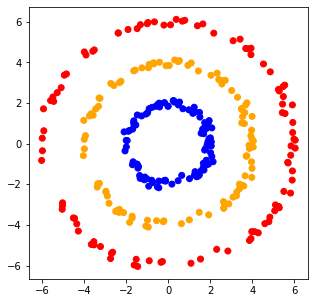

In [4]:
fig = plt.figure()
fig.set_size_inches((5,5))
color = ['orange' if l == 1 else 'red' if l == 2 else 'b' for l in labels]
plt.scatter(data[:, 0], data[:, 1], c=color)
plt.show()

## a)

In [5]:
def kernel_PCA(xs, kernel, l=2):
    
   # YOUR CODE HERE

## b)

In [7]:
# apply kernel PCA and 2d plot

# YOUR CODE HERE

In [8]:
# 3d plot

# YOUR CODE HERE